# Water Potability Prediction

# Content

# 1. Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data=pd.read_csv('water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [6]:
data.shape

(3276, 10)

In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# 2.  EDA

# 2.1. Univariate Analysis

# 2.1.1. Potability

<AxesSubplot:xlabel='Potability', ylabel='count'>

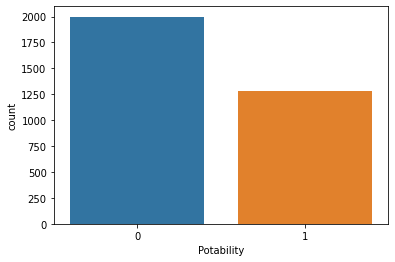

In [9]:
sns.countplot(data['Potability'])

In [246]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# 2.1.2 PH

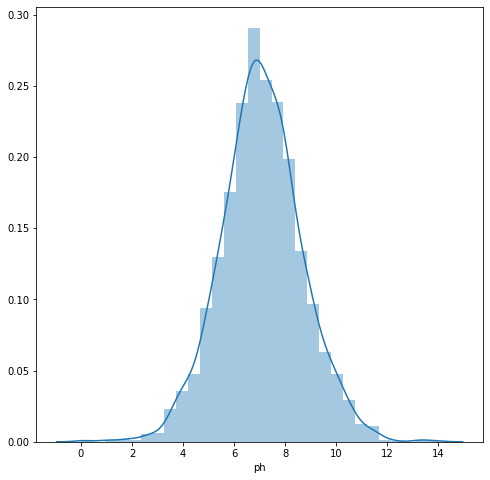

In [10]:
plt.figure(figsize = (8,8))
sns.distplot(data['ph'],bins=30)
plt.show()

In [11]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

# 2.1.3. Hardness

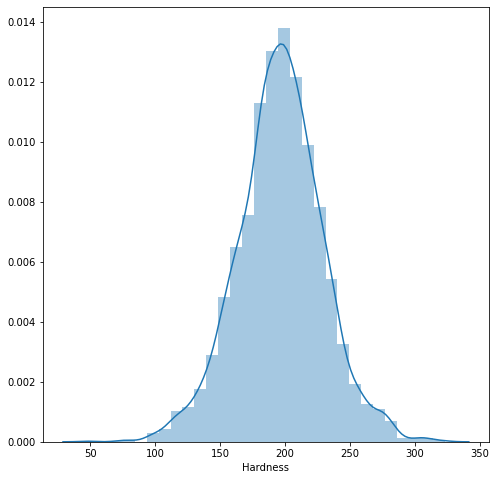

In [12]:
plt.figure(figsize = (8,8))
sns.distplot(data['Hardness'],bins=30)
plt.show()

In [13]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

# 2.1.4. Solids

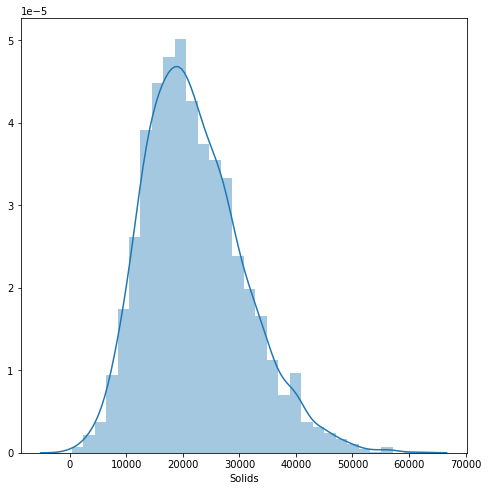

In [14]:
plt.figure(figsize = (8,8))
sns.distplot(data['Solids'],bins=30)
plt.show()

In [15]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

# 2.1.5. Chloramines

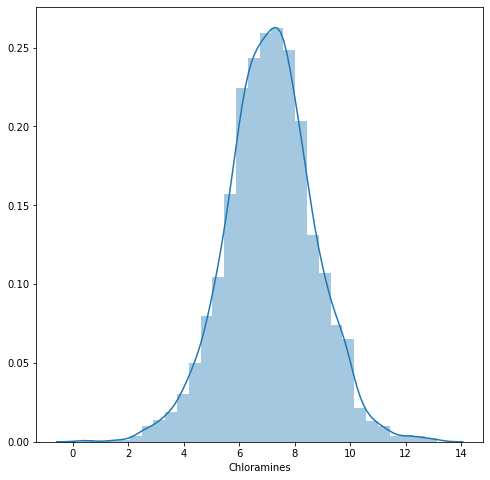

In [16]:
plt.figure(figsize = (8,8))
sns.distplot(data['Chloramines'],bins=30)
plt.show()

In [17]:
data.Chloramines.describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

# 2.1.6. Sulfate

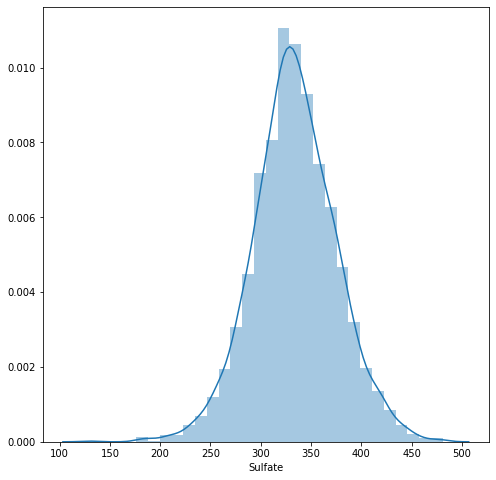

In [18]:
plt.figure(figsize = (8,8))
sns.distplot(data['Sulfate'],bins=30)
plt.show()

In [19]:
data['Sulfate'].describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

# 2.1.7. Conductivity

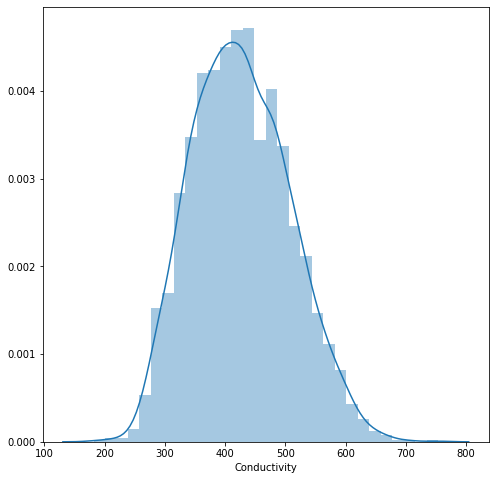

In [20]:
plt.figure(figsize = (8,8))
sns.distplot(data['Conductivity'],bins=30)
plt.show()

In [21]:
data['Conductivity'].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

# 2.2.Multivariate Analysis

# 2.2.1. Heatmap

<AxesSubplot:>

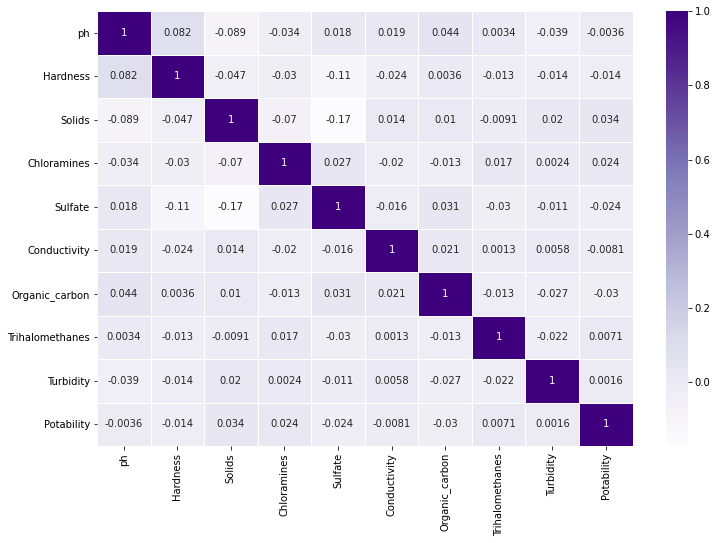

In [10]:
# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5, cmap="Purples")

From the heatmap, we can observe from the heatmaps that there is no correlation between the features.

# 2.2.2. Pairplot

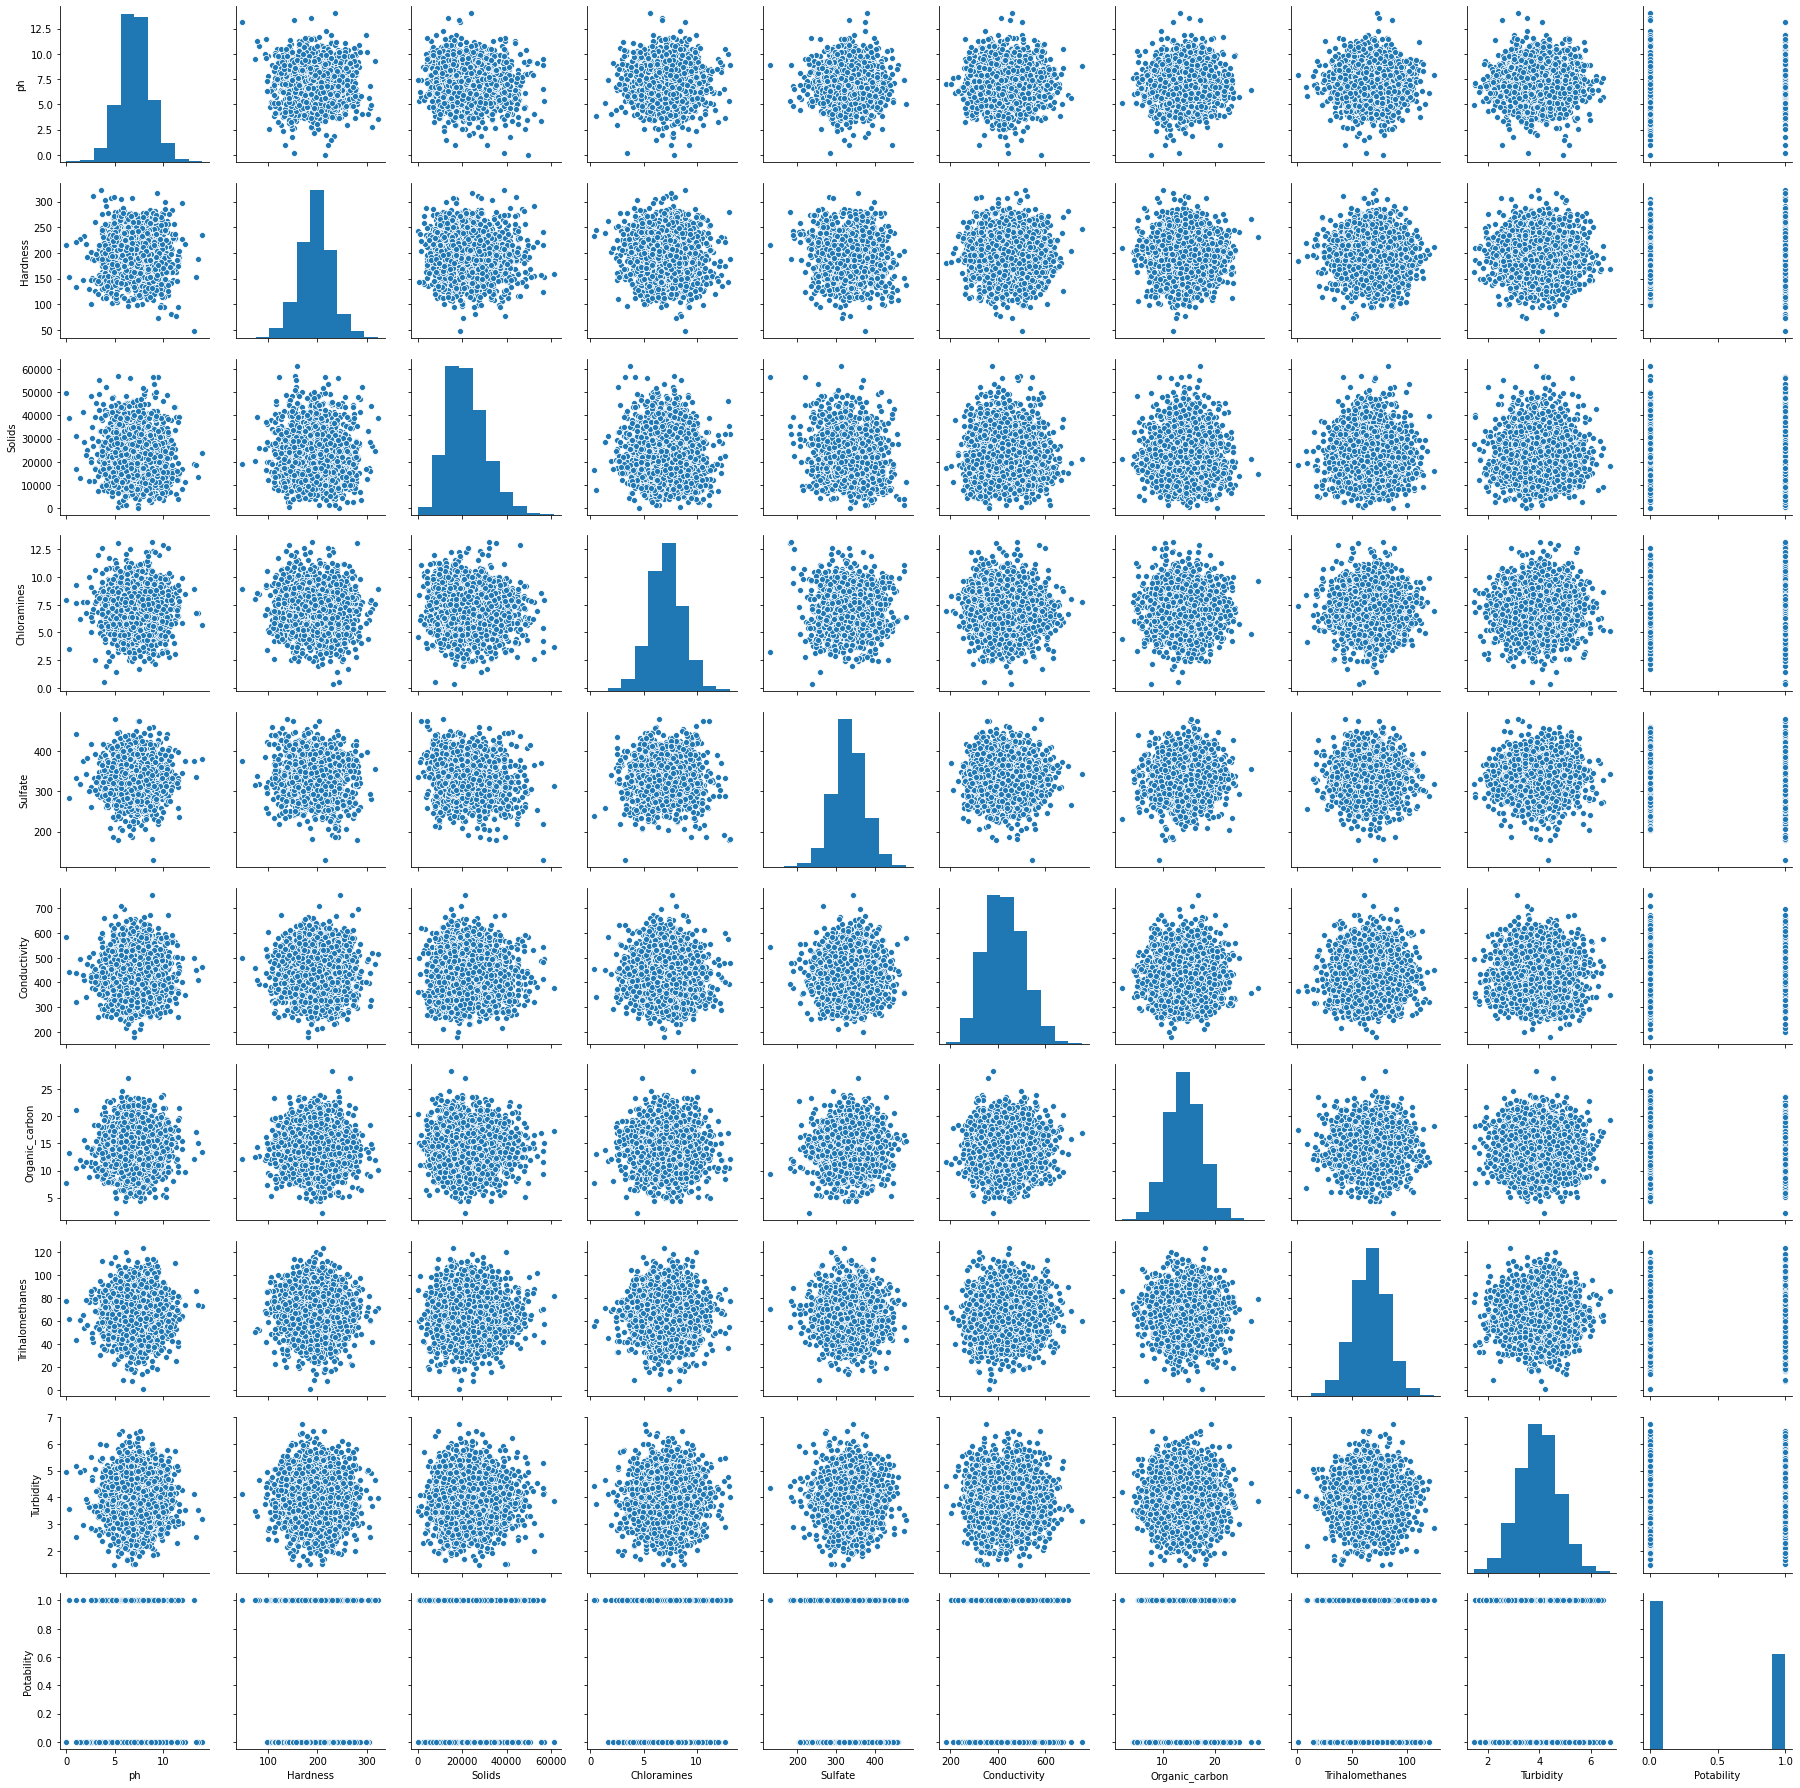

In [25]:
sns.pairplot(data)

# 2.3. Outlier Analysis

Text(0, 0.5, 'Potability')

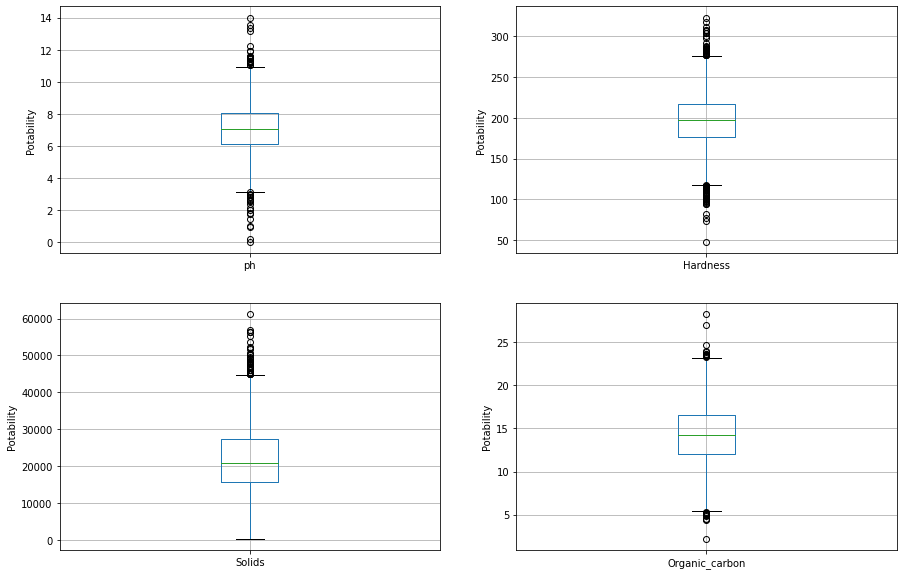

In [27]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='ph')
fig.set_title('')
fig.set_ylabel('Potability')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Hardness')
fig.set_title('')
fig.set_ylabel('Potability')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='Solids')
fig.set_title('')
fig.set_ylabel('Potability')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='Organic_carbon')
fig.set_title('')
fig.set_ylabel('Potability')

# 3.Data Preprocessing

# 3.1. Missing Values Imputation

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df1=data[data['Potability']==1].copy()
df2=data[data['Potability']==0].copy()
df1['ph']=df1['ph'].replace(np.nan, df1['ph'].median())
df2['ph']=df2['ph'].replace(np.nan, df2['ph'].median())
df1['Sulfate']=df1['Sulfate'].replace(np.nan, df1['Sulfate'].median())
df2['Sulfate']=df2['Sulfate'].replace(np.nan, df2['Sulfate'].median())
df1['Trihalomethanes']=df1['Trihalomethanes'].replace(np.nan, df1['Trihalomethanes'].median())
df2['Trihalomethanes']=df2['Trihalomethanes'].replace(np.nan, df2['Trihalomethanes'].median())
data1=pd.concat([df1,df2], axis=0, ignore_index=True)
data1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
data1.shape

(3276, 10)

In [12]:
data1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# 3.2. Extracting New Features

Creating additional features including type of water and degree of hardness.

In [13]:
data1['ph'] = data1['ph'].round(decimals = 1)
def water_type(x):
    if x>8:
        y='Alkaline'
    elif x<=8 and x>7.5:
        y='Seawater'
    elif x==7.5:
        y='Tap'
    elif x< 7.5 and x>=6.5:
        y='Bottled'
    elif x<6.5 and x>=5.5:
        y='Distilled'
    else:
        y='Acidic'
    return y
        
data1['Type'] = data1['ph'].apply(lambda x: water_type(x))

In [14]:
data1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type
0,9.4,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1,Alkaline
1,9.0,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1,Alkaline
2,7.0,169.974849,23403.637304,8.519730,331.838167,475.573562,12.924107,50.861913,2.747313,1,Bottled
3,6.8,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1,Bottled
4,7.2,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1,Bottled


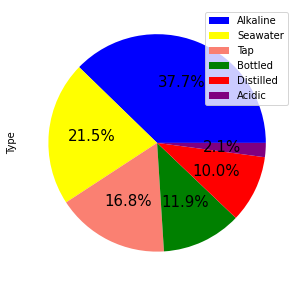

In [15]:

plt.figure(figsize=(7,5))

data1['Type'].value_counts().plot(kind='pie',labels = ['','','','','',''], autopct='%1.1f%%', colors = ['blue','yellow','salmon','green','red','purple'],  textprops = {"fontsize":15})

plt.legend(labels=['Alkaline', 'Seawater','Tap','Bottled','Distilled','Acidic'])
plt.show()

In [16]:
def hard_type(x):
    if x>=0 and x<17.1:
        y='Soft'
    elif x>=17.1 and x<120:
        y='Medium hard'
    elif x>=120 and x<180:
        y='Hard'
    else:
        y='Very hard'
    return y
        
data1['Hard_type'] = data1['Hardness'].apply(lambda x: hard_type(x))

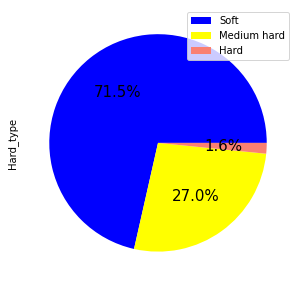

In [17]:
plt.figure(figsize=(7,5))

data1['Hard_type'].value_counts().plot(kind='pie',labels = ['','','',''], autopct='%1.1f%%', colors = ['blue','yellow','salmon','green'],  textprops = {"fontsize":15})
plt.legend(labels=['Soft', 'Medium hard','Hard','Very hard'])
plt.show()

In [18]:
data1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability', 'Type',
       'Hard_type'],
      dtype='object')

In [19]:
data1.shape

(3276, 12)

In [20]:
data1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type,Hard_type
0,9.4,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1,Alkaline,Hard
1,9.0,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1,Alkaline,Hard
2,7.0,169.974849,23403.637304,8.519730,331.838167,475.573562,12.924107,50.861913,2.747313,1,Bottled,Hard
3,6.8,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1,Bottled,Very hard
4,7.2,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1,Bottled,Very hard


# 3.3 Encoding of Categorical Variables

In [21]:
data2 = pd.get_dummies(data1, columns = ['Type', 'Hard_type'])
data2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type_Acidic,Type_Alkaline,Type_Bottled,Type_Distilled,Type_Seawater,Type_Tap,Hard_type_Hard,Hard_type_Medium hard,Hard_type_Very hard
0,9.4,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1,0,1,0,0,0,0,1,0,0
1,9.0,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1,0,1,0,0,0,0,1,0,0
2,7.0,169.974849,23403.637304,8.519730,331.838167,475.573562,12.924107,50.861913,2.747313,1,0,0,1,0,0,0,1,0,0
3,6.8,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1,0,0,1,0,0,0,0,0,1
4,7.2,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1,0,0,1,0,0,0,0,0,1


In [22]:
X= data2.drop('Potability', axis=1)
y=data2['Potability']

# 3.4. Feature Importance

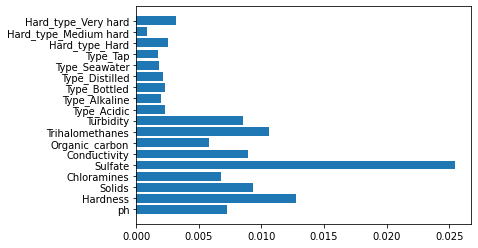

In [49]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)  
extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.barh(X.columns, feature_importance_normalized)
plt.show()

As we can see that all features are important. The most important feature is Hardness.

In [50]:
abs(data2.corr()['Potability']).sort_values(ascending=False)

Potability               1.000000
Type_Alkaline            0.039060
Type_Acidic              0.034344
Solids                   0.033743
Hard_type_Medium hard    0.033619
Type_Bottled             0.033341
Hard_type_Very hard      0.030828
Organic_carbon           0.030001
Sulfate                  0.025339
Type_Seawater            0.025110
Chloramines              0.023779
Hard_type_Hard           0.021907
Hardness                 0.013837
Type_Tap                 0.013434
Conductivity             0.008128
Trihalomethanes          0.007094
Type_Distilled           0.004085
ph                       0.002857
Turbidity                0.001581
Name: Potability, dtype: float64

# 4. Balancing the dataset

In [23]:
X_train1, X_test1, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=49)


In [24]:
smk  = SMOTE()
X_train1,y_train = smk.fit_resample(X_train1,y_train)

In [25]:
X_train1.shape

(2764, 18)

In [26]:
X_test1.shape

(983, 18)

In [27]:
y_train.shape

(2764,)

In [28]:
y_test.shape

(983,)

# 5.Model Building 

# 5.1 Random Forest

In [235]:
param_grid={'n_estimators': [10,20,50,100,500], 'max_depth':[1, 5, 10, 50,100]}

Rf = RandomForestClassifier()

In [236]:
grid = GridSearchCV(Rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train1, y_train)

optimal_learners = grid.best_estimator_.n_estimators

print("The optimal number of base learners is : ",optimal_learners)

optimal_depth = grid.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth)

print('Train Accuracy score is ', grid.best_score_)

The optimal number of base learners is :  100

The optimal value of depth is :  50
Train Accuracy score is  0.7644934088109652


In [29]:
rf = RandomForestClassifier(n_estimators= 100, max_depth= 50, n_jobs= -1)
rf.fit(X_train1, y_train)
pred = rf.predict(X_test1)
rf_acc = accuracy_score(y_test, pred)

print('\n****Test accuracy for max depth = 100 and base learners =50 is %f%%' % (rf_acc))


****Test accuracy for max depth = 100 and base learners =50 is 0.729400%


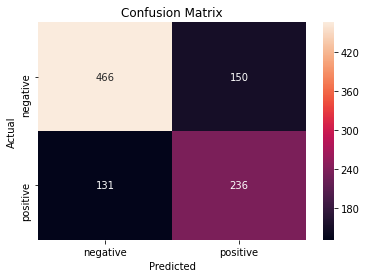

In [64]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Gradient Boosting

In [69]:
gb=GradientBoostingClassifier()
gb_par = {'n_estimators':[100,500, 1000], 'max_depth':[3, 5, 7], 'learning_rate': [0.3, 0.5]}
grid_gb = GridSearchCV(gb, param_grid=gb_par, cv=3)
grid_gb.fit(X_train1, y_train)
grid_gb.best_params_

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 500}

In [70]:
print('Train Accuracy score is ', grid_gb.best_score_)

Train Accuracy score is  0.7366164132010932


In [30]:

gb1=GradientBoostingClassifier(max_depth=7, n_estimators=500, learning_rate=0.3)
gb1.fit(X_train1, y_train)
pred = gb1.predict(X_test1)
gb_acc=accuracy_score(y_test, pred)

In [31]:

print('\n****Test accuracy for max depth = 7 and base learners =500 is %f%%' % (gb_acc))


****Test accuracy for max depth = 7 and base learners =500 is 0.719227%


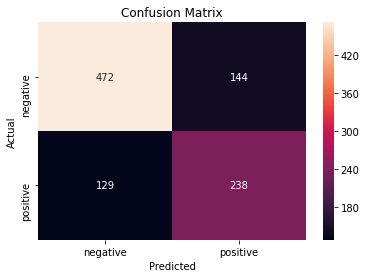

In [73]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XG-Boost

In [242]:

param_grid={'n_estimators': [10,20,50,100], 'max_depth':[1, 5, 10, 50,100]}
xgb = XGBClassifier(n_jobs= -1)
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train1, y_train)

optimal_learners = grid.best_estimator_.n_estimators

print("The optimal number of base learners is : ",optimal_learners)

optimal_depth = grid.best_estimator_.max_depth
print("\nThe optimal value of depth is : ",optimal_depth)

print('Train Accuracy score is ', grid.best_score_)

The optimal number of base learners is :  100

The optimal value of depth is :  5
Train Accuracy score is  0.7623293235841393


In [32]:
xgb = XGBClassifier(n_estimators= 100, max_depth= 50, n_jobs= -1)
xgb.fit(X_train1, y_train)
pred = xgb.predict(X_test1)
xgb_acc = accuracy_score(y_test, pred)

print('\n****Test accuracy for max depth = 50 and base learners =50 is %f%%' % (xgb_acc))


****Test accuracy for max depth = 50 and base learners =50 is 0.712106%


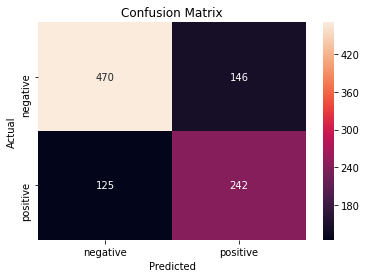

In [76]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [57]:

clf= DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,8,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
   
    
}
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

grid_search.fit(X_train1, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8)})

In [58]:
best_parameters = grid_search.best_params_
print(best_parameters)

print('Training Accuracy score is ', grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Accuracy score is  0.6808907933013602


In [77]:

clf= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf= 5, min_samples_split= 2, splitter='best')

clf.fit(X_train1, y_train)
pred = clf.predict(X_test1)

In [33]:
acc = accuracy_score(y_test, pred)

print('\n****Test accuracy for max depth = 3 and  criteria=entropy is %f%%' % (acc))


****Test accuracy for max depth = 3 and  criteria=entropy is 0.712106%


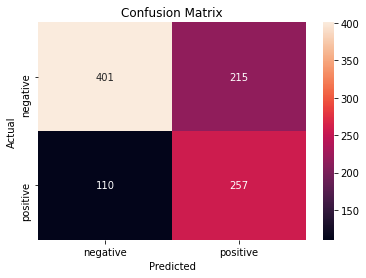

In [79]:
conf_matrix = confusion_matrix(y_test, pred)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(
    conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusion

In [80]:
models = pd.DataFrame({"Model":['Random Forest','XGBoost','GBDT','Decision Tree'],
           "Accuracy":[rf_acc,xgb_acc,gb_acc,acc]})#Creat Data.....
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,XGBoost,0.724313
2,GBDT,0.722279
0,Random Forest,0.714140
3,Decision Tree,0.669379


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

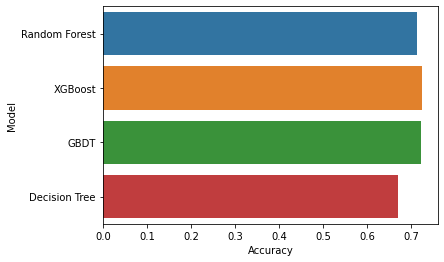

In [81]:
sns.barplot(x= 'Accuracy', y= 'Model', data= models)